# Empirical Risk Minimization

## A tale of two terms {.t}
$$\begin{aligned}\min_{\mathbf{w},b} \quad & \underset{\text{Loss}}{\underbrace{{\color{MyDarkGreen}\sum_{n=1}^N \ell(h_{\mathbf{w},b}(\mathbf{x}_n),y_n)}}} \\[0.5em]  \textrm{s.t.} \quad & \underset{\text{Regularization}}{\underbrace{{\color{MyDarkPurple}r(\mathbf{w})\leq C}}} \end{aligned}$$

The regulzarization generates a **constraint** that limits learned parameter values in some way, in order to favour simpler solutions

. . .

We can also write the same in Lagrangian form:
$$\min_{\mathbf{w},b} \quad \underset{\text{Loss}}{\underbrace{{\color{MyDarkGreen}\sum_{n=1}^N \ell(h_{\mathbf{w},b}(\mathbf{x}_n),y_n)}}} + \underset{\text{Regularization}}{\underbrace{{\color{MyDarkPurple}\lambda r (\mathbf{w}) \vphantom{\sum_{i=1}^{n}}}}}$$

. . .

:::: {.columns}

::: {.column width="75%"}

:::

::: {.column width="25%"}

```{=latex}
\vspace{-6.5em}
\begin{block}{}
\[{\color{MyDarkPurple}C} \downarrow \quad {\color{MyDarkPurple}\lambda} \uparrow\]
\end{block}
```

:::

::::

## Empirical Risk Minimization

$$\min_{\mathbf{w},b} \quad \underset{\text{Loss}}{\underbrace{{\color{MyDarkGreen}\sum_{n=1}^N \ell(h_{\mathbf{w},b}(\mathbf{x}_n),y_n)}}} + \underset{\text{Regularization}}{\underbrace{{\color{MyDarkPurple}\lambda r (\mathbf{w}) \vphantom{\sum_{i=1}^{n}}}}}$$

Lots of ML theory is built on top of this framework: linear models, Support Vector Machines, neural networks...

. . .

The regularization term can take many different forms. The most popular ones are:

- $L_2$ regulatization
- $L_1$ regularization

# $L_2$ regularization

## $L_2$ regularization

The regularizer forces the model to **minimize the squared $L_2$ norm of the weight vector** → $r (\mathbf{w}) = \left\|\mathbf{w}\right\|^2_2$:

$$\min_{\mathbf{w},b} \quad {\color{MyDarkGreen}\sum_{n=1}^N \ell(h_{\mathbf{w},b}(\mathbf{x}_n),y_n)} + {\color{MyDarkPurple}\lambda \left\|\mathbf{w}\right\|^2_2}$$

. . .

Where
$$ \left\|\mathbf{w}\right\|^2_2 = \left(\left\|\mathbf{w}\right\|_2\right)^2 = \left(\sqrt{w_1^2 + w_2^2 + \dots + w_d^2}\right)^2 = \sum_{i=1}^d w_i^2$$

. . .

$\lambda$ is the *regularization strength* → controls the tradeoff between loss and regularization

## $L_2$ regularization
$L_2$ regularization has the effect of **shrinking** the estimated parameters $\mathbf{w}$ to smaller values

Smaller values for $\mathbf{w}$ generate more *conservative* predictions, potentially preventing overfitting

## $L_2$ regularization {.t}

![](images/loss_1_transparent.png){height=90% fig-align="center"}

## $L_2$ regularization

![](images/loss_3.png){height=90% fig-align="center"}

## $L_2$ regularization

![](images/loss_4.png){height=90% fig-align="center"}

## $L_2$ regularization

![](images/loss_5.png){height=90% fig-align="center"}

## $L_2$ regularization

![](images/loss_6.png){height=90% fig-align="center"}

## $L_2$ regularization

![](images/loss_7.png){height=90% fig-align="center"}

## $L_2$ regularization

![](images/loss_8.png){height=90% fig-align="center"}

## What happens if we increase $\lambda$?

![](images/loss_9.png){height=90% fig-align="center"}

## Sample dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_style("darkgrid")
sns.set(font_scale=0.5)

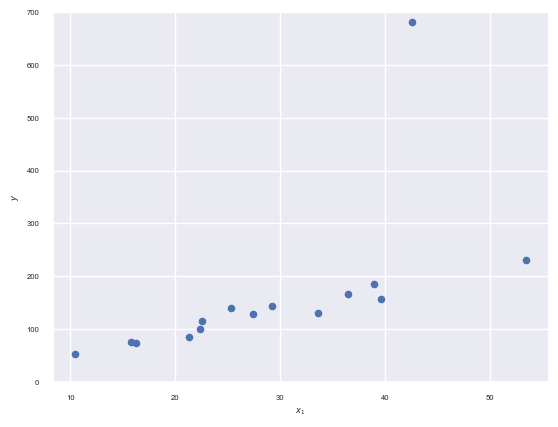

In [2]:
rng = np.random.default_rng(12345)

df = pd.DataFrame({"x1": rng.normal(30, 10, 15)})

df["y"] = 4*df["x1"] + 12 + rng.normal(0, 10, 15)

df.loc[1, "y"] += 490

ax = df.plot(kind="scatter", x="x1", y="y")
ax.figure.set_facecolor("#ffffff00")
ax.set_ylim(0, 700)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$");

## Linear regression

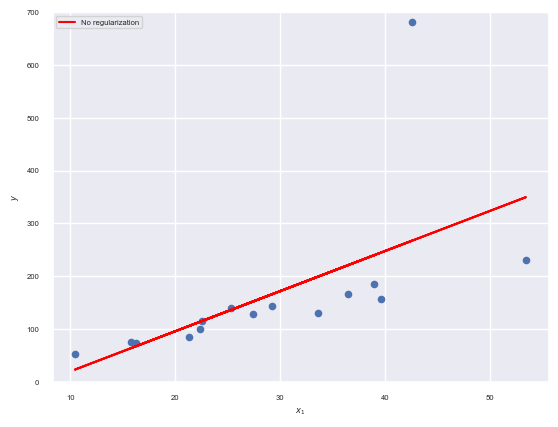

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lr = Pipeline([("std", StandardScaler()), ("lr", LinearRegression())])

lr.fit(df[["x1"]], df["y"])
df["pred_lr"] = lr.predict(df[["x1"]])

ax = df.plot(kind="scatter", x="x1", y="y")
df.plot(kind="line", x="x1", y="pred_lr", ax=ax, color="red", label="No regularization")
ax.figure.set_facecolor("#ffffff00")
ax.legend(loc=2)
ax.set_ylim(0, 700)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$y$");

## $L_2$-regularized linear regression

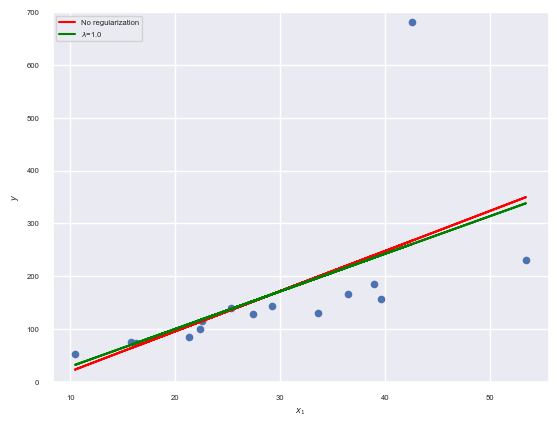

In [4]:
from sklearn.linear_model import Ridge

def plot_ridge(alpha):
    lr = Pipeline([("std", StandardScaler()), ("lr", Ridge(alpha=alpha))])

    lr.fit(df[["x1"]], df["y"])
    
    df["pred_L2"] = lr.predict(df[["x1"]])
    
    ax = df.plot(kind="scatter", x="x1", y="y")
    df.plot(kind="line", x="x1", y="pred_lr", ax=ax, color="red", label="No regularization")
    df.plot(kind="line", x="x1", y="pred_L2", ax=ax, color="green", label="$\lambda$=%.1f" % alpha)
    ax.figure.set_facecolor("#ffffff00")
    ax.legend(loc=2)
    ax.set_ylim(0, 700)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$y$");

plot_ridge(alpha=1.0)

## $L_2$-regularized linear regression

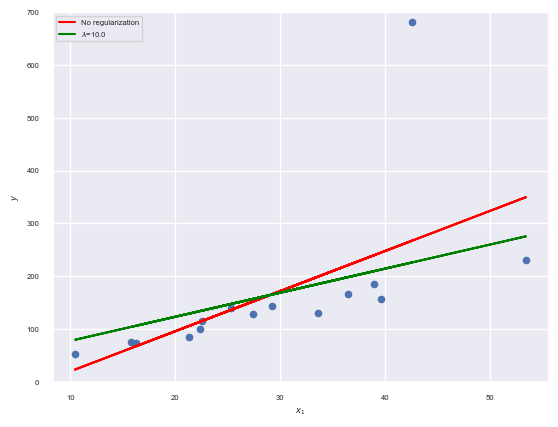

In [5]:
plot_ridge(alpha=10.0)

## $L_2$-regularized linear regression

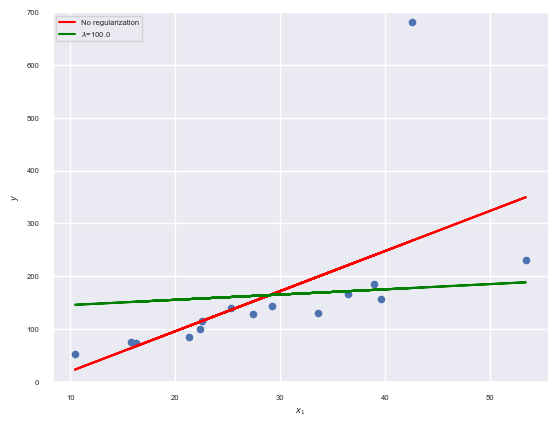

In [6]:
plot_ridge(alpha=100.0)

# $L_1$ regularization

## $L_1$ regularization

The regularizer forces the model to **minimize the $L_1$ norm of the weight vector** → $r (\mathbf{w}) = \left\|\mathbf{w}\right\|_1$:

$$\min_{\mathbf{w},b} \quad {\color{MyDarkGreen}\sum_{n=1}^N \ell(h_{\mathbf{w},b}(\mathbf{x}_n),y_n)} + {\color{MyDarkPurple}\lambda \left\|\mathbf{w}\right\|_1}$$

. . .

Where
$$ \left\|\mathbf{w}\right\|_1 = \sum_{i=1}^d \lvert w_i \rvert$$

## $L_1$ regularization

$L_1$ regularization has the effect of turning some of the parameters in $\mathbf{w}$ to exactly $0$

This induces **model sparsity**, where some of the features/dimensions are completely disregarded—a $w_i$ of $0$ makes the feature it multiplies to have no effect on the final prediction

. . .

Therefore, $L_1$ regularization performs **feature selection** implicitly

## $L_1$ regularization

![](images/loss_10.png){height=90% fig-align="center"}

## What happens if we increase $\lambda$?

![](images/loss_11.png){height=90% fig-align="center"}

## $L_2$ and $L_1$ regularization
For the specific case of linear regression:

- Linear regression with $L_2$ regularization → *Ridge*
- Linear regression with $L_1$ regularization → *LASSO*
- Linear regression with both $L_1$ and $L_2$ regularization → *Elastic Net*

. . .

$$\begin{aligned} \text{Elastic Net} \,\, = & \,\, \min_{\mathbf{w},b} \,\, {\color{MyDarkGreen}\frac{1}{N} \sum_{n=1}^N (\mathbf{w}^\top \mathbf{x}_n + b - y_n)^2} + {\color{MyDarkPurple}\lambda (}\underset{L_1 \atop\text{ regularization}}{\underbrace{\vphantom{\left(\frac{1 - \alpha}{2}\right)}{\color{MyDarkPurple}\alpha \left\|\mathbf{w}\right\|_1}}} {\color{MyDarkPurple}+} \underset{L_2 \atop\text{ regularization}}{\underbrace{{\color{MyDarkPurple} \left(\frac{1 - \alpha}{2}\right) \left\|\mathbf{w}\right\|^2_2)}}} \\ & \alpha \in [0, 1)\end{aligned}$$

## Q&A
```{=latex}
\begin{center}
\vspace{-60pt}
\Huge Questions?
\end{center}
```